In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_excel("data_filtered.xlsx")

In [110]:
df[["Index_disease_id","Index_disease","Associated_disease_id","Associated_disease","Class","JIg"]]

,Index_disease_id,Index_disease,Associated_disease_id,Associated_disease,Class,JIg
0,C0007193,Cardiomyopathy Dilated,C0000737,Abdominal Pain,C23,0.054404
1,C0007193,Cardiomyopathy Dilated,C0000744,Abetalipoproteinemia,C16;C18,0.015845
2,C0007193,Cardiomyopathy Dilated,C0000768,Congenital Abnormality,C16,0.066932
3,C0007193,Cardiomyopathy Dilated,C0000772,Multiple congenital anomalies,C16,0.026918
4,C0007193,Cardiomyopathy Dilated,C0000786,Spontaneous abortion,C13,0.026393
...,...,...,...,...,...,...
22858,C0151744,Myocardial Ischemia,C4539767,EXUDATIVE VITREORETINOPATHY 7,0,0.001323
22859,C0151744,Myocardial Ischemia,C4539808,"SPINOCEREBELLAR ATAXIA, AUTOSOMAL RECESSIVE 25",0,0.001323
22860,C0151744,Myocardial Ischemia,C4551571,Cranioectodermal dysplasia,C05;C16;C17,0.001305
22861,C0151744,Myocardial Ischemia,C4551771,Kleefstra syndrome,C05;C10;C14;C16;C23;F01;F03,0.001309


In [8]:
a=df[['Index_disease','Index_disease_id']].groupby('Index_disease').count().sort_values(by=['Index_disease_id'], ascending=False)

In [10]:
a.reset_index(inplace=True)

In [11]:
a

,Index_disease,Index_disease_id
0,Hypertensive disease,6831
1,Myocardial Infarction,6255
2,Myocardial Ischemia,5070
3,Cardiomyopathy Dilated,4707


In [21]:
df['Associated_disease'].value_counts()

Abdominal Pain                                                                           4
Chiari malformation type II                                                              4
Ventricular Remodeling                                                                   4
Left Ventricle Remodeling                                                                4
Manganese Poisoning                                                                      4
                                                                                        ..
FOCAL SEGMENTAL GLOMERULOSCLEROSIS 2                                                     1
NONCOMPACTION OF LEFT VENTRICULAR MYOCARDIUM, FAMILIAL ISOLATED, AUTOSOMAL DOMINANT 1    1
ECTRODACTYLY, ECTODERMAL DYSPLASIA, AND CLEFT LIP/PALATE SYNDROME 3                      1
NEPHRONOPHTHISIS 3                                                                       1
RETINITIS PIGMENTOSA 79                                                                  1

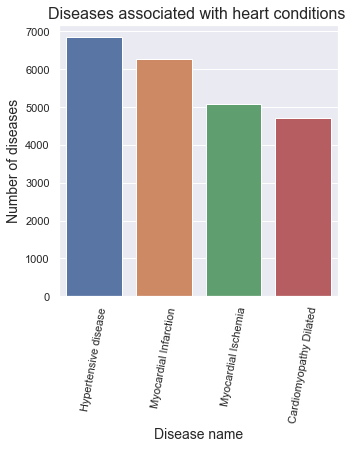

In [17]:
sns.set(rc = {'figure.figsize':(5,5)})
sns.barplot(x='Index_disease',y='Index_disease_id', data=a)
plt.xticks(rotation=80)
plt.ylabel('Number of diseases', fontsize=14)
plt.title('Diseases associated with heart conditions ', fontsize=16)
plt.xlabel('Disease name', fontsize=14)
plt.show()

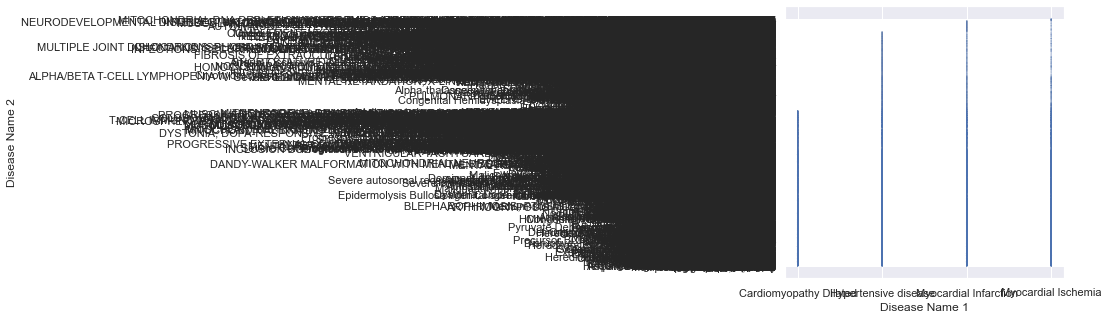

In [19]:
plt.scatter(df['Index_disease'], df['Associated_disease'], s=df['JIg'])
plt.xlabel('Disease Name 1')
plt.ylabel('Disease Name 2')
plt.show()

In [81]:
b=df[['Associated_disease', 'Associated_disease_id', 'JIg']].groupby('JIg').max().sort_values(by=['JIg'], ascending=False)

In [82]:
b.reset_index(inplace=True)

In [83]:
b.drop_duplicates(inplace=True)

In [84]:
b['Associated_disease'].value_counts()

Coronary Arteriosclerosis           4
Bloom Syndrome                      4
Hereditary gingival fibromatosis    4
Obesity, Visceral                   4
Drug Dependence                     4
                                   ..
Sotos' syndrome                     1
Pleoconial Myopathies               1
EPILEPSY, PYRIDOXINE-DEPENDENT      1
Lesch-Nyhan Syndrome                1
Tay-Sachs Disease, AB Variant       1
Name: Associated_disease, Length: 2791, dtype: int64

In [88]:
x=b.head(100)

In [89]:
x

,JIg,Associated_disease,Associated_disease_id
0,0.338148,Coronary Arteriosclerosis,C0010054
1,0.337093,Coronary Arteriosclerosis,C0010054
2,0.330104,Atherosclerosis,C0004153
3,0.327280,Coronary Artery Disease,C1956346
4,0.325670,Arteriosclerosis,C0003850
...,...,...,...
95,0.209115,Heart failure,C0018801
96,0.209087,Carcinoma of lung,C0684249
97,0.208649,Pain,C0030193
98,0.208474,Squamous cell carcinoma,C0007137


In [79]:
c=b[['Associated_disease', "JIg"]].groupby('Associated_disease').count().sort_values(by=['JIg'], ascending=False)

In [80]:
c

,JIg
Associated_disease,
MAJOR AFFECTIVE DISORDER 7,4
Gynecomastia,4
"Plaque, Amyloid",4
HIV Infections,4
Pleural Diseases,4
...,...
Eosinophilia-Myalgia Syndrome,1
"Eosinophilia, Tropical",1
Enterocolitis,1


In [70]:
d=c.head(25)

In [71]:
d.reset_index(inplace=True)

In [72]:
d

,Associated_disease,JIg
0,MAJOR AFFECTIVE DISORDER 7,4
1,Gynecomastia,4
2,"Plaque, Amyloid",4
3,HIV Infections,4
4,Pleural Diseases,4
5,HIV Coinfection,4
6,Pleural effusion disorder,4
7,"HEMOCHROMATOSIS, TYPE 1",4
8,Pneumococcal Infections,4
9,HELLP Syndrome,4


In [44]:
c=b[['Associated_disease', 'JIg']].groupby('Associated_disease').count().sort_values(by=['Associated_disease'], ascending=False)

,Associated_disease,JIg
0,MAJOR AFFECTIVE DISORDER 7,4
1,Gynecomastia,4
2,"Plaque, Amyloid",4
3,HIV Infections,4
4,Pleural Diseases,4
5,HIV Coinfection,4
6,Pleural effusion disorder,4
7,"HEMOCHROMATOSIS, TYPE 1",4
8,Pneumococcal Infections,4
9,HELLP Syndrome,4


In [90]:
c=pd.merge(df, x, how='right', on='Associated_disease')

In [91]:
c

,Index_disease_id,Index_disease,N_genes_index,Associated_disease_id_x,Associated_disease,Class,N_genes_associated,N_variants_associated,N_shared_genes,JIg_x,p_value_genes,N_shared_variants,Jiv,JIg_y,Associated_disease_id_y
0,C0007193,Cardiomyopathy Dilated,512,C0010054,Coronary Arteriosclerosis,C14,1282,440,164,0.100613,NaN,3,0.003171,0.338148,C0010054
1,C0020538,Hypertensive disease,2322,C0010054,Coronary Arteriosclerosis,C14,1282,440,757,0.265894,NaN,116,0.082328,0.338148,C0010054
2,C0027051,Myocardial Infarction,1800,C0010054,Coronary Arteriosclerosis,C14,1282,440,777,0.337093,NaN,148,0.152263,0.338148,C0010054
3,C0151744,Myocardial Ischemia,756,C0010054,Coronary Arteriosclerosis,C14,1282,440,515,0.338148,NaN,49,0.099190,0.338148,C0010054
4,C0007193,Cardiomyopathy Dilated,512,C0010054,Coronary Arteriosclerosis,C14,1282,440,164,0.100613,NaN,3,0.003171,0.337093,C0010054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,C0151744,Myocardial Ischemia,756,C0007137,Squamous cell carcinoma,C04,2507,257,375,0.129848,NaN,7,0.019830,0.208474,C0007137
394,C0007193,Cardiomyopathy Dilated,512,C0400966,Non-alcoholic Fatty Liver Disease,C06,1058,0,122,0.084254,NaN,0,0.000000,0.208457,C0400966
395,C0020538,Hypertensive disease,2322,C0400966,Non-alcoholic Fatty Liver Disease,C06,1058,222,546,0.192661,NaN,32,0.025098,0.208457,C0400966
396,C0027051,Myocardial Infarction,1800,C0400966,Non-alcoholic Fatty Liver Disease,C06,1058,222,493,0.208457,NaN,27,0.030857,0.208457,C0400966


In [117]:
df2=c.query("Index_disease == 'Hypertensive disease'")

In [115]:
df

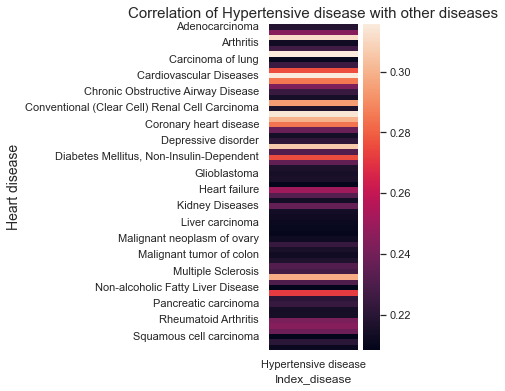

In [122]:
# create the heatmap
sns.set(rc = {'figure.figsize':(2,6)})
sns.heatmap(df2.pivot_table(values='JIg_y', columns='Index_disease', index='Associated_disease'))
plt.ylabel('Diseases', fontsize=14)
plt.ylabel('Heart disease', fontsize=14)
plt.title('Correlation of Hypertensive disease with other diseases', fontsize=15)
plt.show()
